In [72]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [73]:
import pandas as pd
import numpy as np
from math import sqrt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')


In [271]:
raw_data = pd.read_csv('Train.csv')

In [272]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507834 entries, 0 to 1507833
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1507834 non-null  object 
 1   region            913743 non-null   object 
 2   tenure            1507834 non-null  object 
 3   Amount            978320 non-null   float64
 4   refill_frequency  978320 non-null   float64
 5   revenue           999713 non-null   float64
 6   arpu_segment      999713 non-null   float64
 7   frequency         999713 non-null   float64
 8   data_volume       766028 non-null   float64
 9   on_net            957192 non-null   float64
 10  Procuct_1         881271 non-null   float64
 11  Procuct_2         604784 non-null   float64
 12  zone1             118986 non-null   float64
 13  zone2             95505 non-null    float64
 14  mrg               1507834 non-null  object 
 15  regularity        1507834 non-null  int64  
 16  

In [203]:
raw_data.describe(include='all')

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
count,1507834,913743,1507834,978320.000000,978320.000000,999713.000000,999713.000000,999713.000000,7.660280e+05,957192.000000,881271.000000,604784.000000,118986.000000,95505.000000,1507834,1.507834e+06,876011,876011.000000,1.507834e+06
unique,1507834,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,130,NaN,NaN
top,ID_YEB05X4KUGPQ,Mandalore,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,359443,1430080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1507834,NaN,222461,NaN,NaN
mean,NaN,NaN,NaN,2361.212767,11.521423,2352.073152,784.027307,13.967657,3.354667e+03,278.000929,95.325088,23.146017,8.092187,7.465515,NaN,2.804414e+01,NaN,9.263913,1.873648e-01
std,NaN,NaN,NaN,3028.954909,13.266779,3053.176864,1017.723634,14.682316,1.330460e+04,874.412483,203.328016,63.506893,40.739423,32.145740,NaN,2.228078e+01,NaN,12.268658,3.902042e-01
min,NaN,NaN,NaN,4.270000,1.000000,0.430000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000e+00,NaN,1.000000,0.000000e+00
25%,NaN,NaN,NaN,427.350000,2.000000,427.350000,142.310000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,NaN,6.000000e+00,NaN,2.000000,0.000000e+00
50%,NaN,NaN,NaN,1282.050000,7.000000,1282.050000,427.350000,9.000000,2.560000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,NaN,2.400000e+01,NaN,5.000000,0.000000e+00
75%,NaN,NaN,NaN,3141.030000,16.000000,3146.580000,1048.720000,20.000000,2.879000e+03,156.000000,99.000000,20.000000,3.000000,5.000000,NaN,5.100000e+01,NaN,12.000000,0.000000e+00


In [204]:
raw_data.isnull().sum()

ID                        0
region               594091
tenure                    0
Amount               529514
refill_frequency     529514
revenue              508121
arpu_segment         508121
frequency            508121
data_volume          741806
on_net               550642
Procuct_1            626563
Procuct_2            903050
zone1               1388848
zone2               1412329
mrg                       0
regularity                0
top_pack             631823
freq_top_pack        631823
Target                    0
dtype: int64

In [273]:
tenuremap = {
    'K > 24 month': 24,
    'I 18-21 month': (18 + 21) / 2,
    'H 15-18 month': (15 + 18) / 2,
    'G 12-15 month': (12 + 15) / 2,
    'J 21-24 month': (21 + 24) / 2,
    'F 9-12 month': (9 + 12) / 2,
    'E 6-9 month': (6 + 9) / 2,
    'D 3-6 month': (3 + 6) / 2,
}
raw_data['tenure'] = raw_data['tenure'].map(tenuremap)


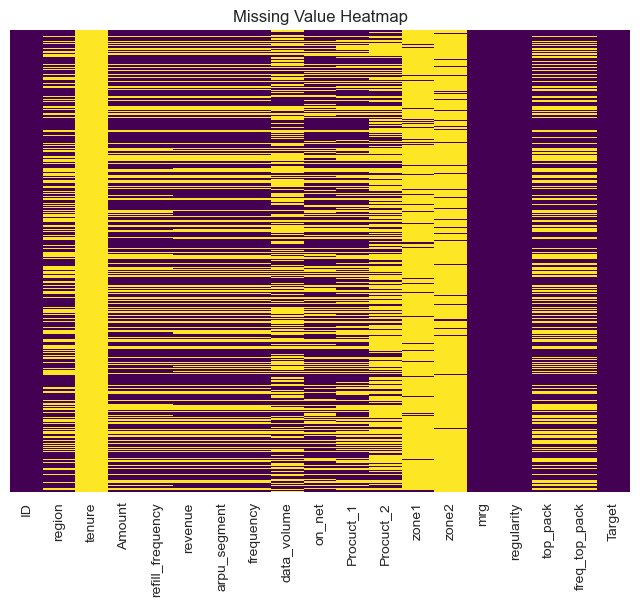

In [243]:
plt.figure(figsize=(8, 6))
sns.heatmap(raw_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

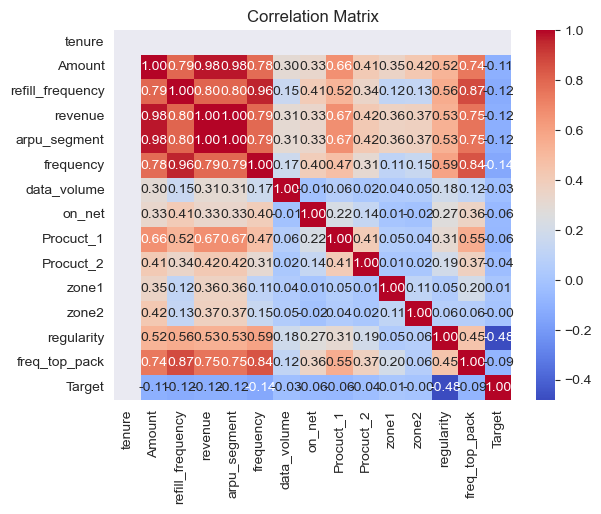

In [244]:
correlation_matrix = raw_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [81]:
features = raw_data[['tenure','Amount','frequency','regularity','Target']]

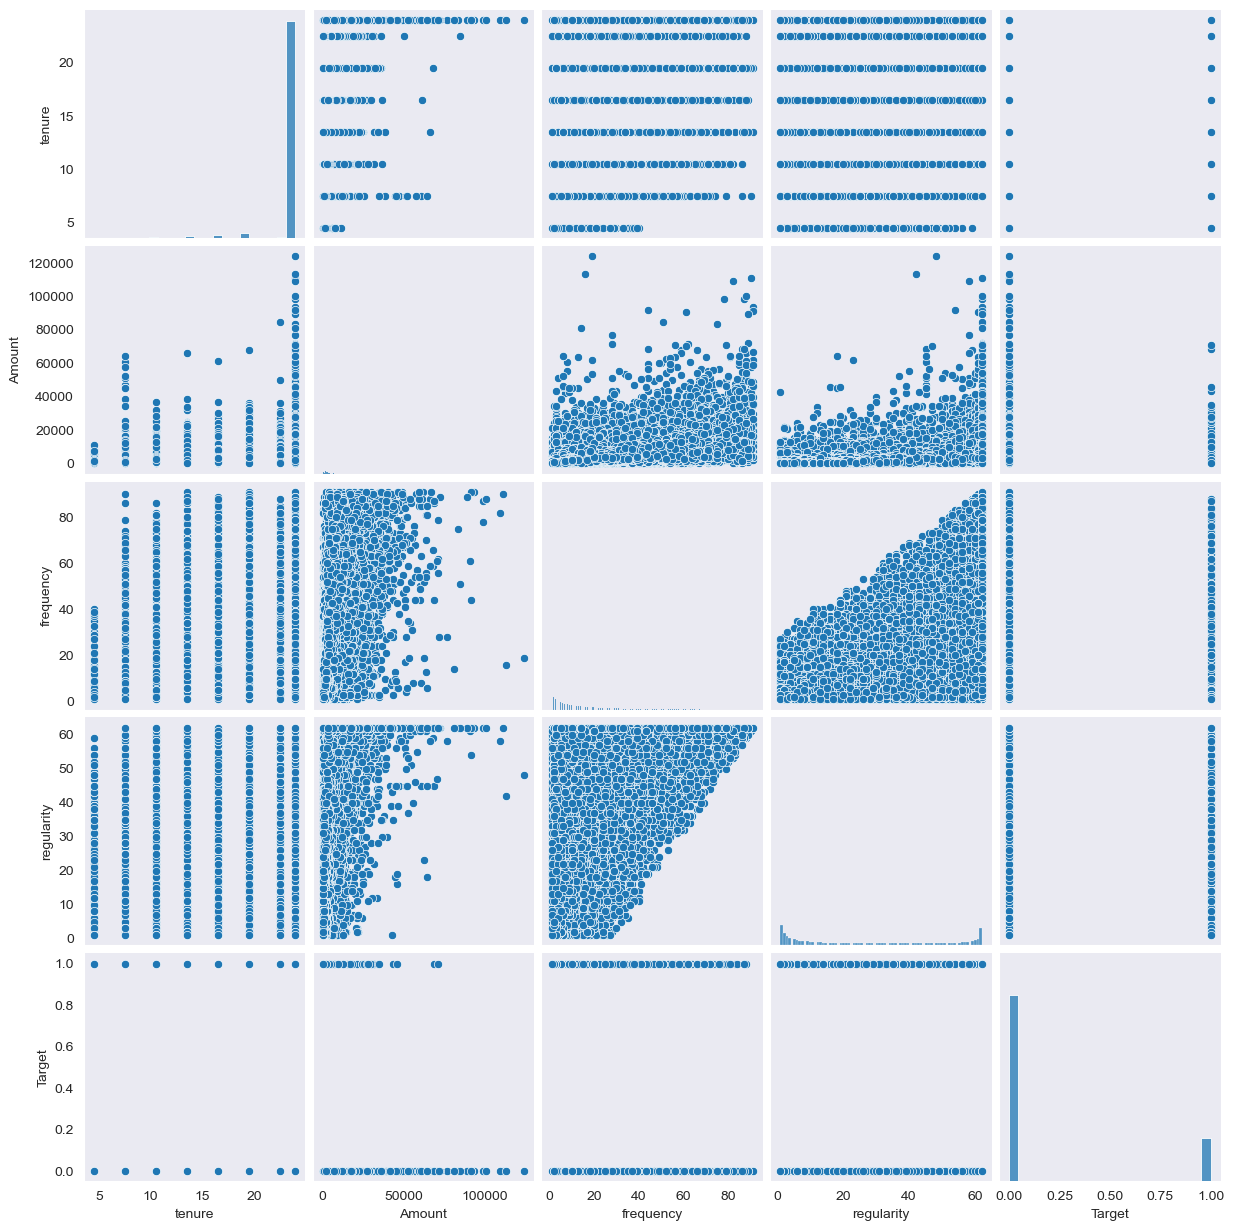

In [82]:
sns.pairplot(data = features)

In [83]:
features = raw_data[['data_volume','on_net','Procuct_1','Procuct_2', 'regularity','Target']]

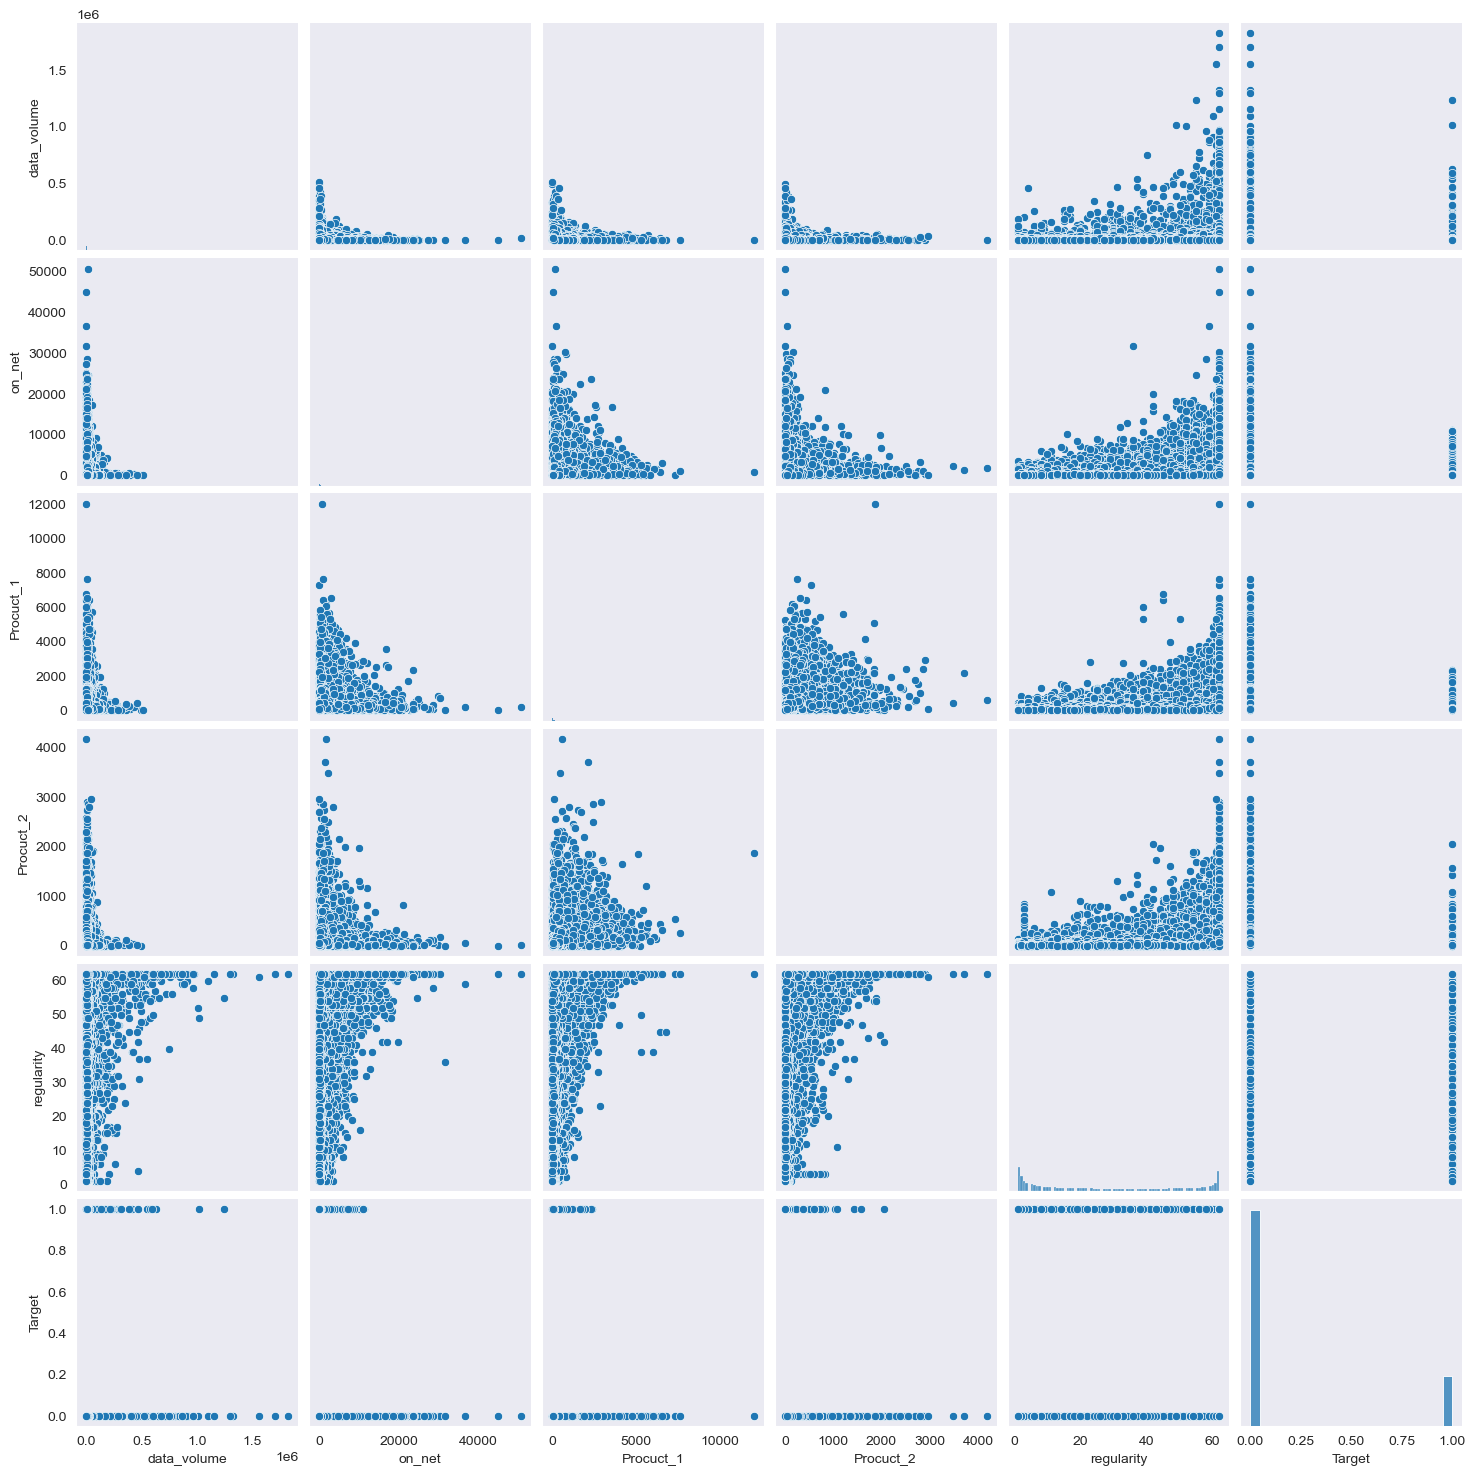

In [84]:
sns.pairplot(data = features)

In [85]:
raw_data.groupby('tenure').mean()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target
tenure,,,,,,,,,,,,,,
4.5,1154.681712,5.087087,1101.525227,367.186073,6.148036,5874.873596,109.390071,31.556000,15.610687,13.952381,4.321429,15.454713,4.540441,0.155268
7.5,2984.944589,11.387368,2999.015749,999.672806,14.108901,14747.705813,288.172717,117.743462,24.888000,5.840336,22.857143,30.821429,9.172333,0.159938
10.5,2238.719423,11.647362,2241.253223,747.084651,13.977922,7057.350211,264.480187,75.562554,19.129509,5.094270,8.927565,25.832311,8.968767,0.240190
13.5,2111.997327,11.159670,2102.992213,701.003097,13.574483,4275.936134,234.888116,69.488577,19.030190,12.674387,7.073795,22.748472,8.632678,0.320596
16.5,2051.740523,10.968820,2028.467141,676.159016,13.491595,3326.899739,282.710242,71.609238,19.487387,5.639456,8.906999,25.044576,8.575517,0.267077
19.5,2243.436350,11.837692,2217.053583,739.020245,14.423965,3924.225269,264.372644,79.432035,19.830557,7.470000,8.536211,25.254921,9.219379,0.270496
22.5,2349.033828,12.251107,2322.803370,774.270000,14.952491,4061.783874,257.886267,83.781453,21.739297,14.488789,9.907666,26.752779,9.738681,0.231616
24.0,2369.015488,11.521283,2360.475160,786.827981,13.963095,3301.166311,278.665128,96.217835,23.291806,8.081595,7.386713,28.203575,9.276502,0.183046


In [150]:
test_df = raw_data.iloc[:,2:19].copy().drop(columns =['top_pack','mrg'])
test_df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target
0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
1,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,NaN,NaN,NaN,62,31.0,0
2,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,1.0,NaN,NaN,61,NaN,0
3,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0
4,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,NaN,NaN,62,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,41,4.0,0
1507830,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,NaN,NaN,NaN,NaN,36,2.0,0
1507831,24.0,1923.08,9.0,2136.75,712.39,10.0,NaN,34.0,74.0,48.0,NaN,NaN,40,10.0,0
1507832,24.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,39,NaN,0


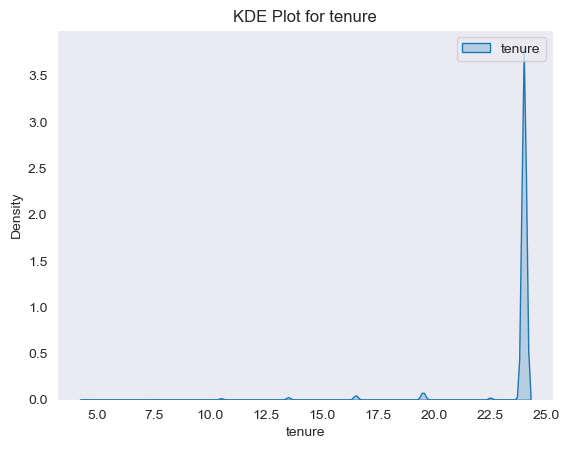

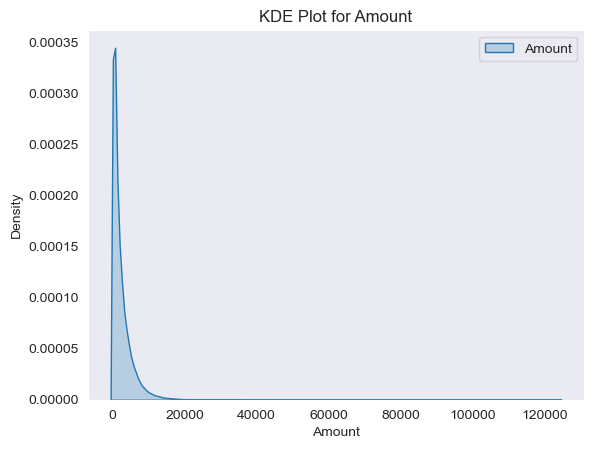

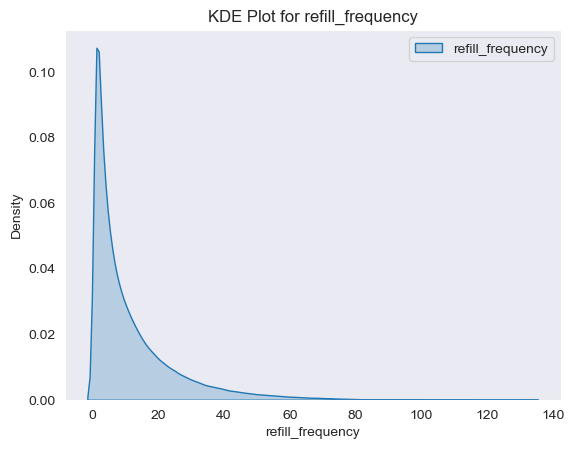

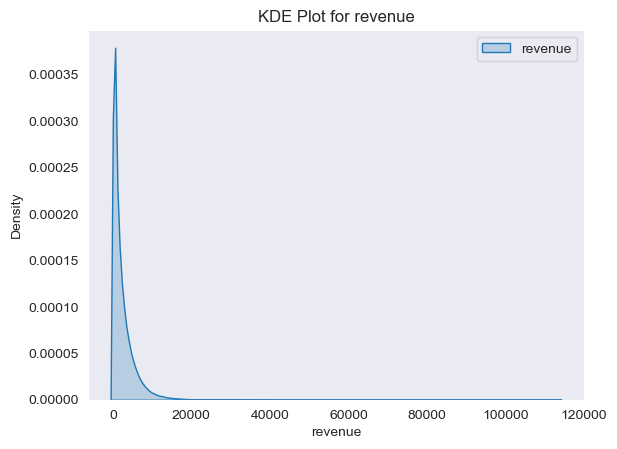

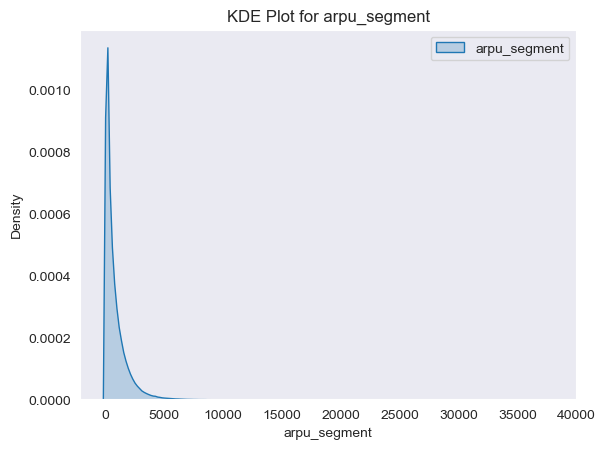

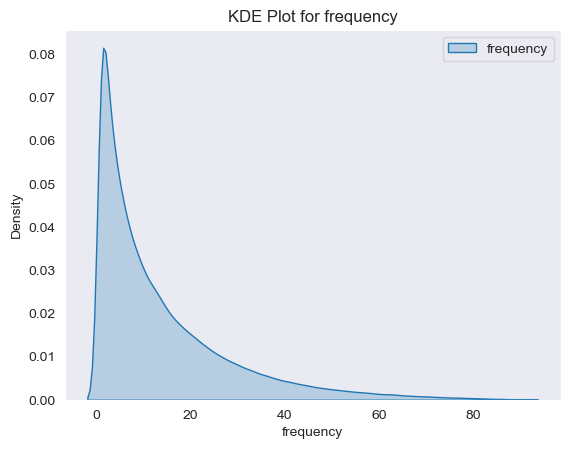

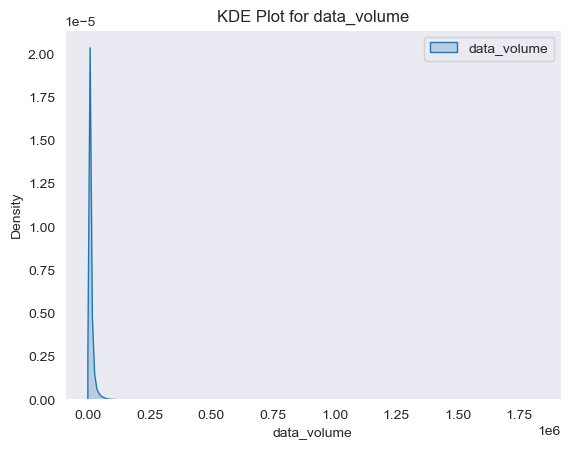

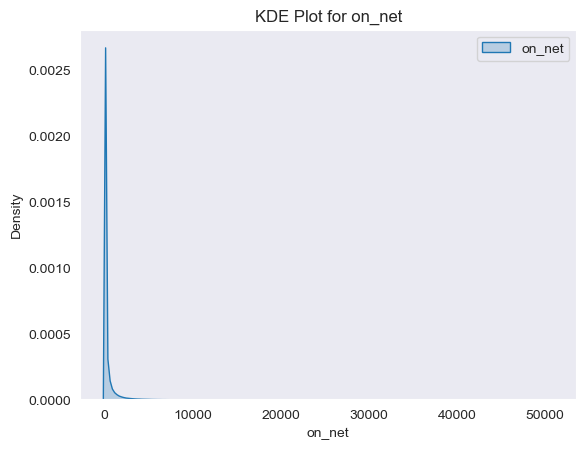

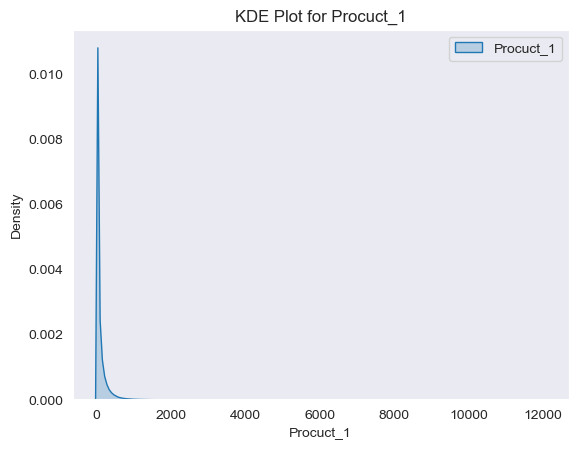

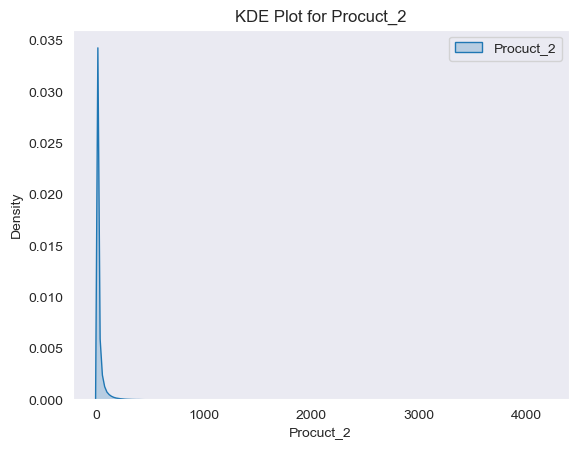

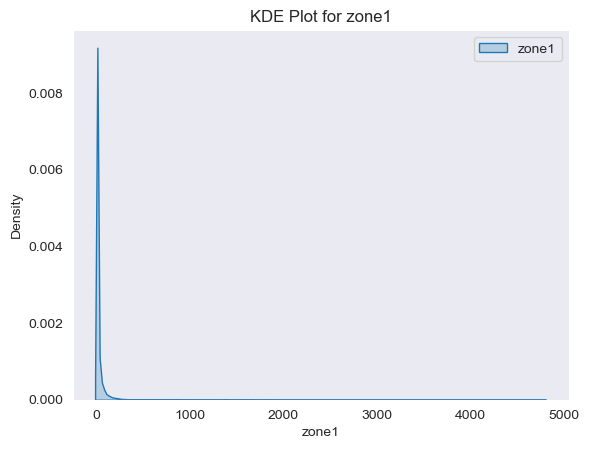

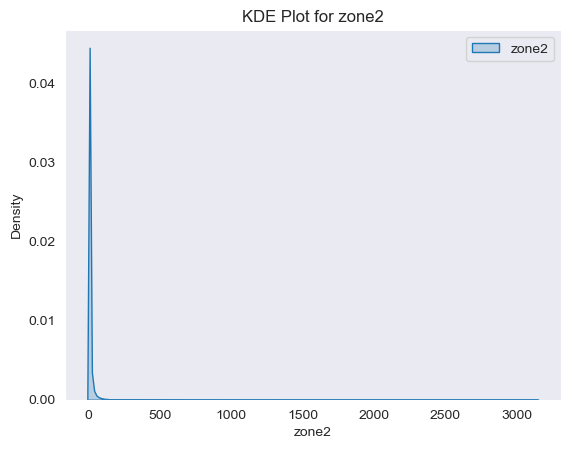

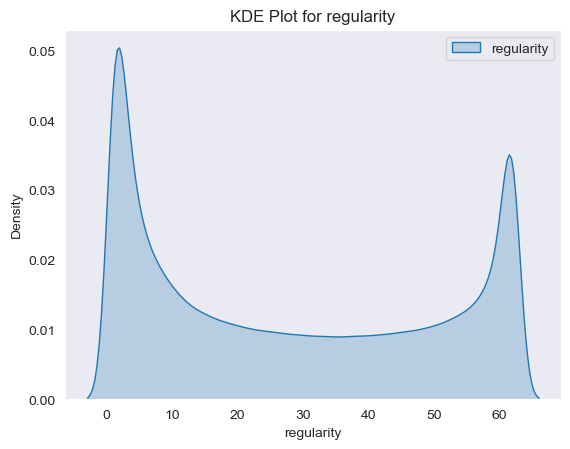

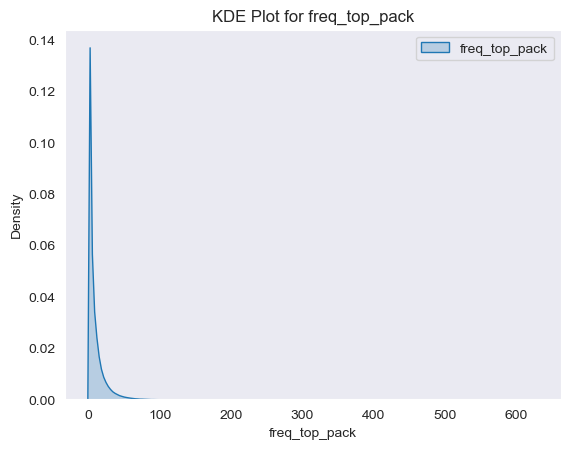

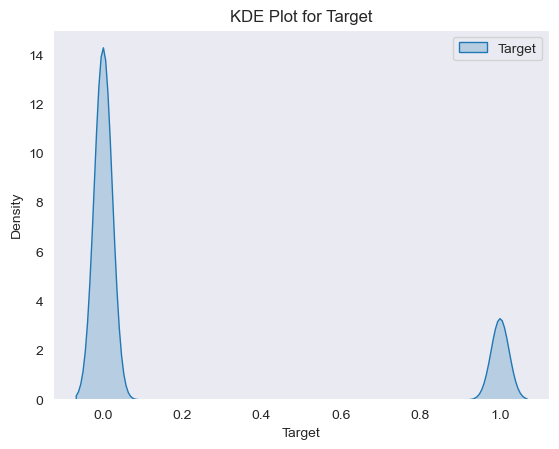

In [87]:
for column in test_df.columns:
    sns.kdeplot(test_df[column], label=column, shade=True)
    plt.title(f'KDE Plot for {column}')
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


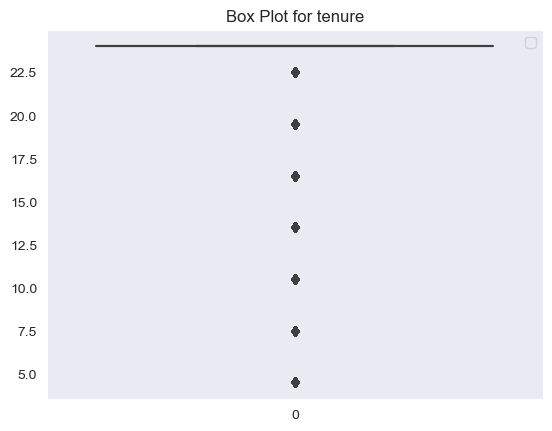

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


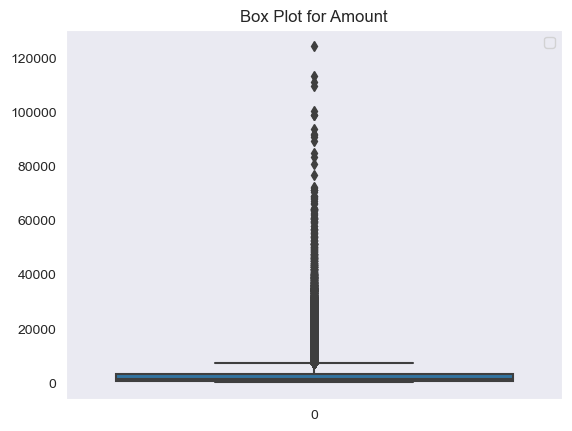

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


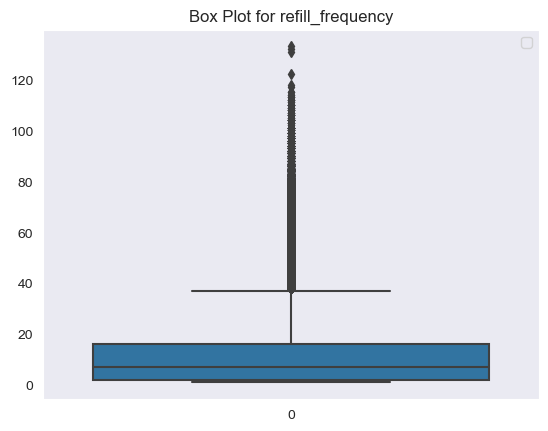

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


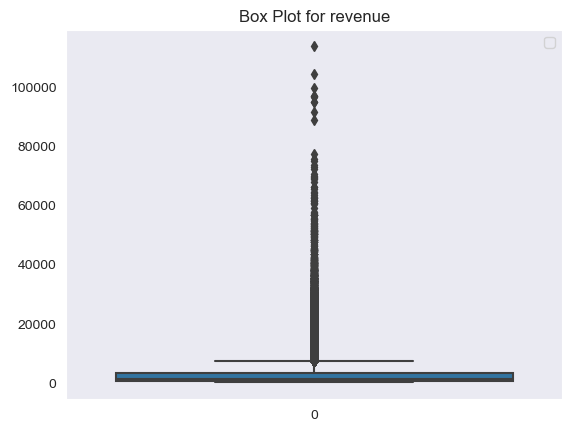

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


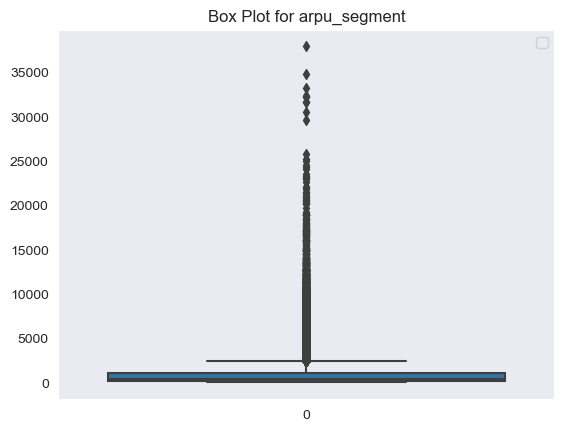

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


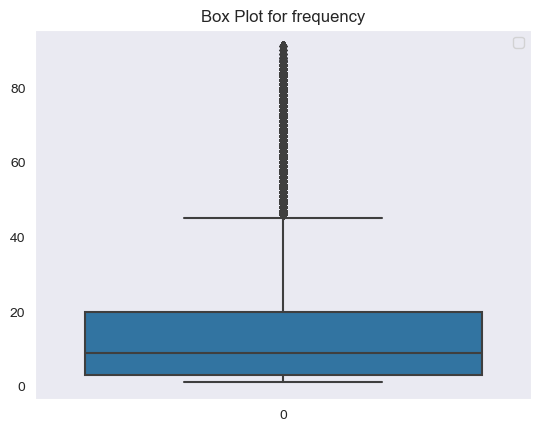

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


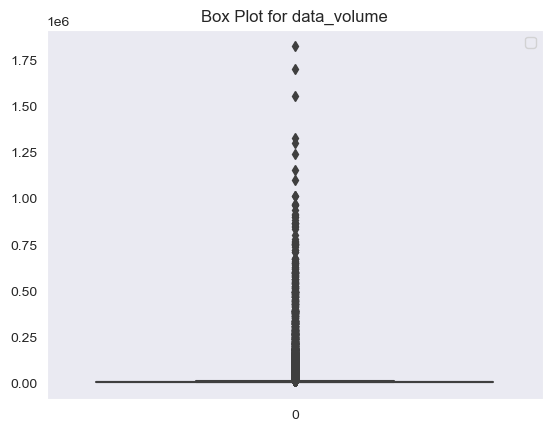

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


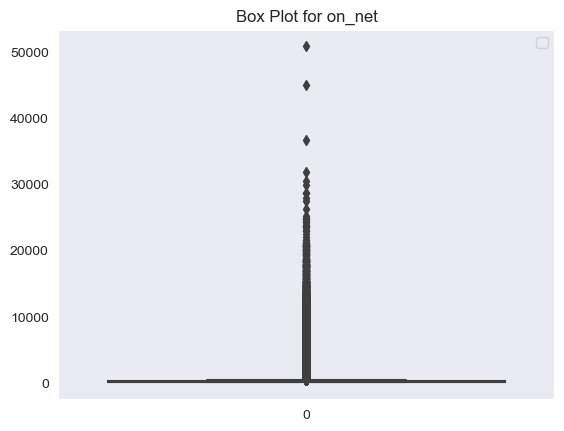

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


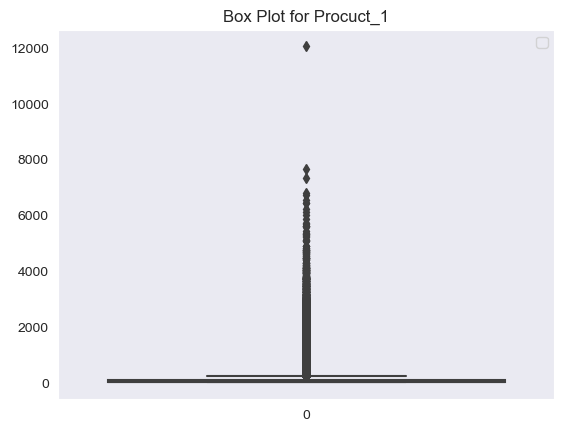

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


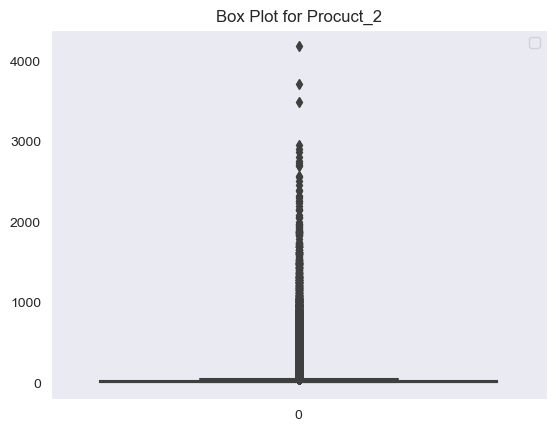

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


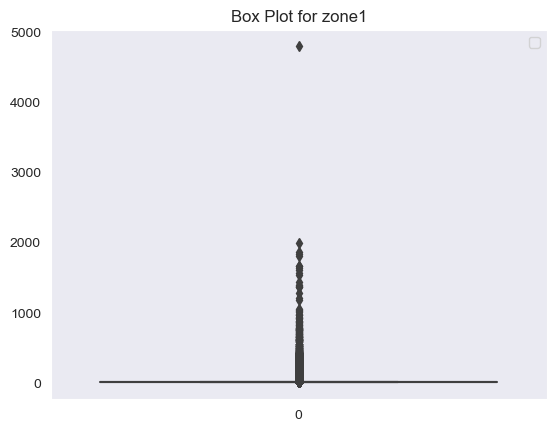

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


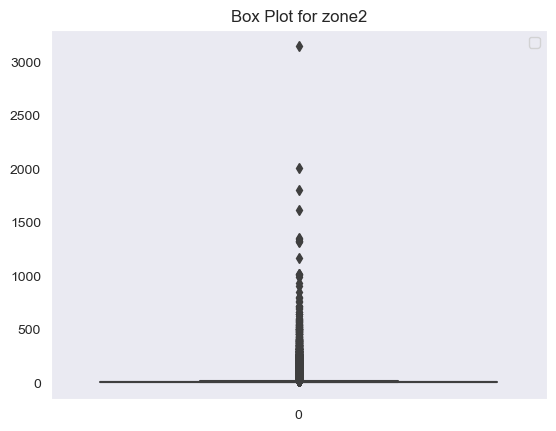

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


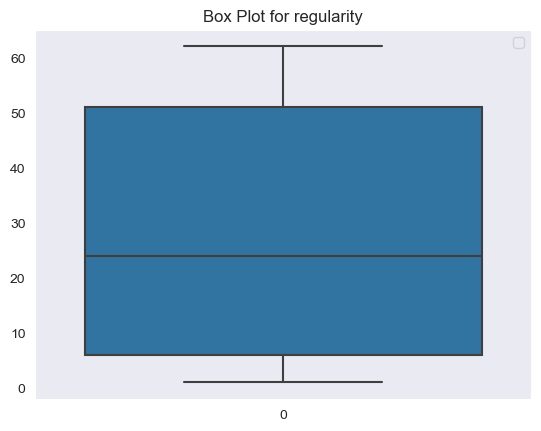

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


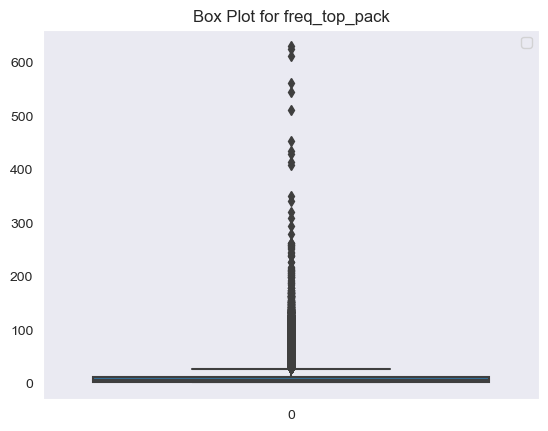

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


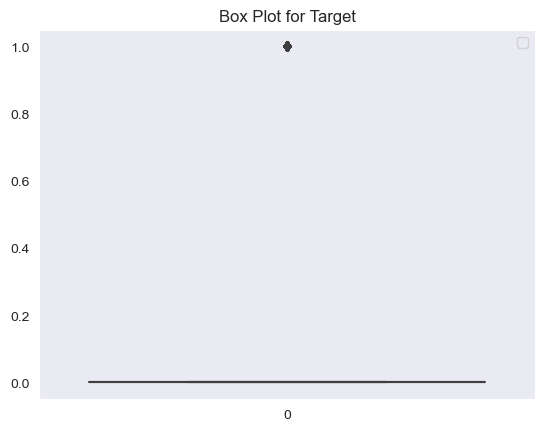

In [88]:

for column in test_df.columns:
    sns.boxplot(test_df[column])
    plt.title(f'Box Plot for {column}')
    plt.legend()
    plt.show()
    


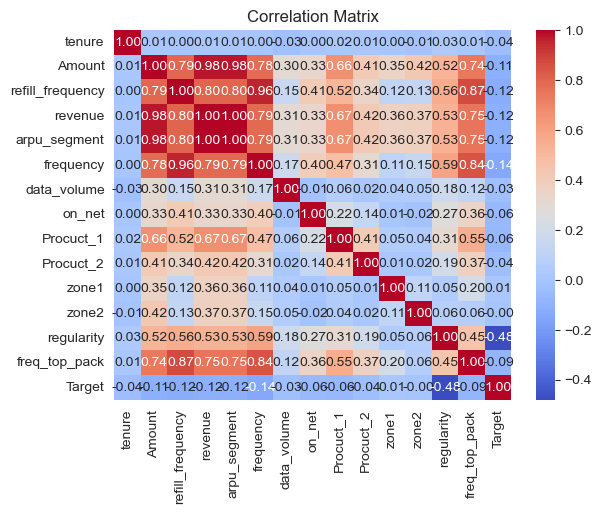

In [89]:

correlation_matrix = test_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


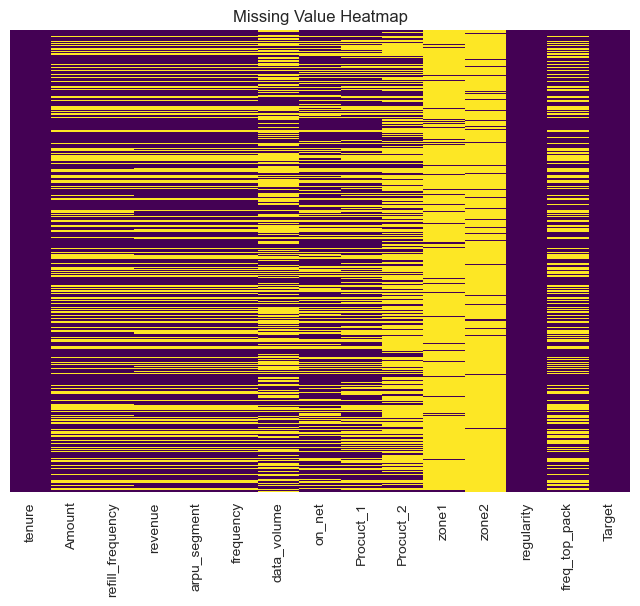

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [297]:
df = raw_data.copy().drop(columns=['mrg','Procuct_2', 'zone1', 'zone2'])

In [275]:
df.isnull().sum()

ID                       0
region              594091
tenure                   0
Amount              529514
refill_frequency    529514
revenue             508121
arpu_segment        508121
frequency           508121
data_volume         741806
on_net              550642
Procuct_1           626563
regularity               0
top_pack            631823
freq_top_pack       631823
Target                   0
dtype: int64

In [247]:
df['tenure'].value_counts()

Series([], Name: tenure, dtype: int64)

In [248]:
df[df['Amount'].isnull()].isnull().sum()

ID                       0
region              381074
tenure              529514
Amount              529514
refill_frequency    529514
revenue             492538
arpu_segment        492538
frequency           492538
data_volume         418414
on_net              438855
Procuct_1           506609
regularity               0
top_pack            524349
freq_top_pack       524349
Target                   0
dtype: int64

In [249]:
df[df['Amount'].isnull()]['Target'].value_counts()

0    295959
1    233555
Name: Target, dtype: int64

In [250]:
df['Target'].value_counts()

0    1225319
1     282515
Name: Target, dtype: int64

In [251]:
df[df['Target']==1].isnull().sum()

ID                       0
region              266137
tenure              282515
Amount              233555
refill_frequency    233555
revenue             228575
arpu_segment        228575
frequency           228575
data_volume         226619
on_net              232906
Procuct_1           246962
regularity               0
top_pack            247319
freq_top_pack       247319
Target                   0
dtype: int64

In [253]:
df[df.notnull().all(axis=1)]['Target'].value_counts()

Series([], Name: Target, dtype: int64)

In [99]:
df['region'].value_counts()

Mandalore     359443
Droidika      126263
Eclipsara      83978
Celestial      69238
Stellaris      67954
Luminous       46936
Nebula         38557
Zodiacalia     30745
Nebulith       27208
Astral         24868
Quasar         20251
Radiantara     15439
Forcehaven      2169
Eternum          694
Name: region, dtype: int64

In [100]:
df[df['region'].isnull()].describe(include='all')

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,top_pack,freq_top_pack,Target
count,594091,0,594091.000000,213017.000000,213017.000000,223671.000000,223671.000000,223671.000000,1.977130e+05,208762.000000,173040.000000,594091.000000,175147,175147.000000,594091.000000
unique,594091,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,NaN,NaN
top,ID_YEB05X4KUGPQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38053,NaN,NaN
mean,NaN,NaN,23.567006,1507.317051,7.665646,1463.666354,487.892101,9.212084,2.903829e+03,150.972940,54.288679,13.312976,NaN,6.436057,0.447973
std,NaN,NaN,1.889580,2370.282084,10.315007,2373.615735,791.203766,11.580745,2.191779e+04,619.595364,139.264009,16.453194,NaN,9.471851,0.497286
min,NaN,NaN,4.500000,8.550000,1.000000,0.430000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,NaN,1.000000,0.000000
25%,NaN,NaN,24.000000,213.680000,1.000000,213.680000,71.370000,2.000000,0.000000e+00,2.000000,3.000000,2.000000,NaN,1.000000,0.000000
50%,NaN,NaN,24.000000,641.030000,4.000000,641.030000,213.680000,5.000000,1.490000e+02,8.000000,15.000000,6.000000,NaN,3.000000,0.000000
75%,NaN,NaN,24.000000,1794.870000,9.000000,1713.465000,571.155000,12.000000,1.489000e+03,54.000000,48.000000,18.000000,NaN,7.000000,1.000000


In [101]:
df[df['region'].notnull()].isnull().sum()

ID                       0
region                   0
tenure                   0
Amount              148440
refill_frequency    148440
revenue             137701
arpu_segment        137701
frequency           137701
data_volume         345428
on_net              165313
Procuct_1           205512
regularity               0
top_pack            212879
freq_top_pack       212879
Target                   0
dtype: int64

In [102]:
df.groupby('region').sum()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
region,,,,,,,,,,,,
Astral,591811.5,3.945089e+07,197744.0,4.001341e+07,1.333792e+07,246439.0,1.678044e+07,7599947.0,1605656.0,943718,146075.0,344
Celestial,1640251.5,1.153739e+08,577442.0,1.170558e+08,3.901895e+07,707764.0,5.261894e+07,22726313.0,4464449.0,2670539,426699.0,1108
Droidika,2992632.0,2.635942e+08,1238652.0,2.680012e+08,8.933400e+07,1536402.0,2.334657e+08,34269890.0,9060514.0,4785426,909031.0,2046
Eclipsara,1977601.5,1.846115e+08,1015199.0,1.873272e+08,6.244256e+07,1216057.0,1.116923e+08,28554019.0,6667864.0,3295986,726394.0,1065
Eternum,16518.0,1.290791e+06,5358.0,1.326968e+06,4.423233e+05,6776.0,5.224260e+05,165188.0,74584.0,20064,4359.0,24
Forcehaven,51319.5,3.304984e+06,13725.0,3.385225e+06,1.128409e+06,17872.0,2.289567e+06,267748.0,176419.0,64644,10830.0,95
Luminous,1114144.5,5.594690e+07,244482.0,5.665291e+07,1.888442e+07,321646.0,1.017092e+08,5403112.0,1419279.0,1427564,182434.0,1311
Mandalore,8529702.0,9.577680e+08,4422974.0,9.776619e+08,3.258879e+08,5485992.0,1.296279e+09,73637042.0,35313910.0,13584135,3185354.0,6867
Nebula,914128.5,8.146267e+07,431197.0,8.255382e+07,2.751806e+07,522802.0,2.633438e+07,12859058.0,3530954.0,1528626,310389.0,586


In [103]:
df.groupby('region').median()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
region,,,,,,,,,,,,
Astral,24.0,1068.38,6.0,1068.380,355.980,8.0,1.0,59.0,31.0,42.0,4.0,0.0
Celestial,24.0,1175.21,6.0,1154.700,385.040,8.0,3.0,51.0,31.0,42.0,4.0,0.0
Droidika,24.0,1495.73,7.0,1495.730,498.720,10.0,306.0,38.0,30.0,42.0,5.0,0.0
Eclipsara,24.0,1623.93,9.0,1598.075,532.695,12.0,124.0,54.0,34.0,44.0,6.0,0.0
Eternum,24.0,1495.73,5.0,1463.250,487.610,7.0,6.0,38.5,49.5,26.0,5.0,0.0
Forcehaven,24.0,1068.38,4.0,1068.800,356.410,6.0,259.0,18.0,34.0,27.0,3.0,0.0
Luminous,24.0,940.17,4.0,915.380,305.130,6.0,772.0,8.0,13.0,29.0,3.0,0.0
Mandalore,24.0,2008.55,9.0,2008.550,669.660,12.0,1323.5,26.0,39.0,42.0,6.0,0.0
Nebula,24.0,1495.73,8.0,1495.730,498.720,11.0,16.0,68.0,45.0,44.0,6.0,0.0


In [104]:
df.groupby('region').mean()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
region,,,,,,,,,,,,
Astral,23.798114,1946.173631,9.755019,1948.262347,649.426338,11.999172,1158.310347,366.739710,86.970859,37.949091,7.815677,0.013833
Celestial,23.690047,2032.697352,10.173576,2035.753537,678.590509,12.308939,1314.750312,391.158571,86.287887,38.570424,8.045763,0.016003
Droidika,23.701575,2504.339305,11.768106,2510.926196,836.977938,14.394682,3007.687747,332.549490,94.239976,37.900462,9.402083,0.016204
Eclipsara,23.549043,2541.597320,13.976527,2550.474074,850.160086,16.556707,2249.140838,394.376186,99.611049,39.248208,10.800434,0.012682
Eternum,23.801153,2491.874710,10.343629,2434.803413,811.602404,12.433028,1550.225519,323.898039,146.818898,28.910663,9.100209,0.034582
Forcehaven,23.660443,1970.771682,8.184258,1964.727139,654.909321,10.372606,1890.641618,180.423181,107.967564,29.803596,7.101639,0.043799
Luminous,23.737526,1648.357527,7.203147,1636.752310,545.587515,9.292636,3287.091300,165.101510,53.140595,30.415118,6.059320,0.027932
Mandalore,23.730333,3114.550783,14.383000,3133.270538,1044.425317,17.581843,5465.610579,252.694829,121.632436,37.792181,11.350402,0.019105
Nebula,23.708497,2444.858059,12.941086,2448.433166,816.147965,15.505591,1154.662034,380.783476,112.364880,39.645875,10.076256,0.015198


In [105]:
group_df = df.groupby('region').mean().reset_index()

In [106]:
group_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
0,Astral,23.798114,1946.173631,9.755019,1948.262347,649.426338,11.999172,1158.310347,366.739710,86.970859,37.949091,7.815677,0.013833
1,Celestial,23.690047,2032.697352,10.173576,2035.753537,678.590509,12.308939,1314.750312,391.158571,86.287887,38.570424,8.045763,0.016003
2,Droidika,23.701575,2504.339305,11.768106,2510.926196,836.977938,14.394682,3007.687747,332.549490,94.239976,37.900462,9.402083,0.016204
3,Eclipsara,23.549043,2541.597320,13.976527,2550.474074,850.160086,16.556707,2249.140838,394.376186,99.611049,39.248208,10.800434,0.012682
4,Eternum,23.801153,2491.874710,10.343629,2434.803413,811.602404,12.433028,1550.225519,323.898039,146.818898,28.910663,9.100209,0.034582
5,Forcehaven,23.660443,1970.771682,8.184258,1964.727139,654.909321,10.372606,1890.641618,180.423181,107.967564,29.803596,7.101639,0.043799
6,Luminous,23.737526,1648.357527,7.203147,1636.752310,545.587515,9.292636,3287.091300,165.101510,53.140595,30.415118,6.059320,0.027932
7,Mandalore,23.730333,3114.550783,14.383000,3133.270538,1044.425317,17.581843,5465.610579,252.694829,121.632436,37.792181,11.350402,0.019105
8,Nebula,23.708497,2444.858059,12.941086,2448.433166,816.147965,15.505591,1154.662034,380.783476,112.364880,39.645875,10.076256,0.015198
9,Nebulith,23.645729,2267.405928,12.287403,2272.946408,757.650725,14.636761,613.011303,407.072040,110.245739,40.164768,9.676196,0.010659


In [107]:
col_names = group_df.iloc[:,1:11].columns
col_names

Index(['tenure', 'Amount', 'refill_frequency', 'revenue', 'arpu_segment',
       'frequency', 'data_volume', 'on_net', 'Procuct_1', 'regularity'],
      dtype='object')

In [108]:
#group_df.drop(columns=['region','Target'],inplace=True)
group_df.drop(columns='region',inplace=True)

In [109]:
group_df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
0,23.798114,1946.173631,9.755019,1948.262347,649.426338,11.999172,1158.310347,366.739710,86.970859,37.949091,7.815677,0.013833
1,23.690047,2032.697352,10.173576,2035.753537,678.590509,12.308939,1314.750312,391.158571,86.287887,38.570424,8.045763,0.016003
2,23.701575,2504.339305,11.768106,2510.926196,836.977938,14.394682,3007.687747,332.549490,94.239976,37.900462,9.402083,0.016204
3,23.549043,2541.597320,13.976527,2550.474074,850.160086,16.556707,2249.140838,394.376186,99.611049,39.248208,10.800434,0.012682
4,23.801153,2491.874710,10.343629,2434.803413,811.602404,12.433028,1550.225519,323.898039,146.818898,28.910663,9.100209,0.034582
5,23.660443,1970.771682,8.184258,1964.727139,654.909321,10.372606,1890.641618,180.423181,107.967564,29.803596,7.101639,0.043799
6,23.737526,1648.357527,7.203147,1636.752310,545.587515,9.292636,3287.091300,165.101510,53.140595,30.415118,6.059320,0.027932
7,23.730333,3114.550783,14.383000,3133.270538,1044.425317,17.581843,5465.610579,252.694829,121.632436,37.792181,11.350402,0.019105
8,23.708497,2444.858059,12.941086,2448.433166,816.147965,15.505591,1154.662034,380.783476,112.364880,39.645875,10.076256,0.015198
9,23.645729,2267.405928,12.287403,2272.946408,757.650725,14.636761,613.011303,407.072040,110.245739,40.164768,9.676196,0.010659


In [266]:
df[df['Target']==1].isnull().sum()

ID                       0
region              266137
tenure              282515
Amount              233555
refill_frequency    233555
revenue             228575
arpu_segment        228575
frequency           228575
data_volume         226619
on_net              232906
Procuct_1           246962
regularity               0
top_pack            247319
freq_top_pack       247319
Target                   0
dtype: int64

In [279]:
print(raw_data[raw_data['Target'] == 1].median())
print(df[df['Target'] == 1].median())

tenure               24.00
Amount              427.35
refill_frequency      2.00
revenue             347.86
arpu_segment        115.81
frequency             2.00
data_volume          74.00
on_net                5.00
Procuct_1             9.00
Procuct_2             3.00
zone1                 1.00
zone2                 2.00
regularity            2.00
freq_top_pack         2.00
Target                1.00
dtype: float64
tenure               24.00
Amount              427.35
refill_frequency      2.00
revenue             361.54
arpu_segment        120.51
frequency             2.00
data_volume          80.00
on_net                5.00
Procuct_1             9.00
regularity            2.00
freq_top_pack         2.00
Target                1.00
dtype: float64


In [283]:
print(raw_data[raw_data['Target'] == 1].groupby('tenure').median())
print(df[df['Target'] == 1].groupby('tenure').median())

        Amount  refill_frequency  revenue  arpu_segment  frequency  \
tenure                                                               
4.5     427.35               1.0  332.265       110.900        2.0   
7.5     641.03               3.0  589.740       196.580        4.0   
10.5    427.35               2.0  423.080       141.030        3.0   
13.5    405.98               2.0  286.320        95.300        3.0   
16.5    427.35               2.0  257.480        85.685        2.0   
19.5    427.35               2.0  255.560        85.040        2.0   
22.5    427.35               2.0  213.680        71.370        2.0   
24.0    427.35               2.0  361.540       120.510        2.0   

        data_volume  on_net  Procuct_1  Procuct_2  zone1  zone2  regularity  \
tenure                                                                        
4.5           214.5     3.0        5.0        0.0    NaN    1.0         3.0   
7.5           506.0     7.0        8.0        2.0    0.0    2.

In [298]:
df[df['Target'] == 1]

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,top_pack,freq_top_pack,Target
8,ID_GV22KJO949U2,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
12,ID_5TCBKDX86125,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
13,ID_3A7XFFZCIMN3,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1
17,ID_JL8BDJCUG70N,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
21,ID_641DCPD4EHU1,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507813,ID_UK4A38JV3BNL,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1
1507815,ID_JRUXKRGNCE45,NaN,24.0,1858.97,9.0,1730.77,576.92,10.0,1298.0,40.0,78.0,27,MIXT:500F= 2500F on net _2500F off net;2d,3.0,1
1507826,ID_1XD4G9II1BB8,NaN,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
1507828,ID_9GHCP2J4MPZQ,NaN,24.0,213.68,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1


In [299]:
fill_median1 = df[df['Target'] == 1].groupby('tenure')
df[df['Target'] == 1] = df[df['Target'] == 1].fillna(fill_median1.transform('median'))
df[df['Target'] == 1]

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,top_pack,freq_top_pack,Target
8,ID_GV22KJO949U2,NaN,24.0,427.35,2.0,361.54,120.510,2.0,80.0,5.0,9.0,1,NaN,2.0,1
12,ID_5TCBKDX86125,NaN,24.0,427.35,2.0,361.54,120.510,2.0,80.0,5.0,9.0,1,NaN,2.0,1
13,ID_3A7XFFZCIMN3,NaN,24.0,427.35,2.0,361.54,120.510,2.0,80.0,5.0,9.0,2,NaN,2.0,1
17,ID_JL8BDJCUG70N,NaN,24.0,427.35,2.0,361.54,120.510,2.0,80.0,5.0,9.0,1,NaN,2.0,1
21,ID_641DCPD4EHU1,NaN,24.0,427.35,2.0,361.54,120.510,2.0,80.0,5.0,9.0,1,NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507813,ID_UK4A38JV3BNL,NaN,24.0,427.35,2.0,361.54,120.510,2.0,80.0,5.0,9.0,2,NaN,2.0,1
1507815,ID_JRUXKRGNCE45,NaN,24.0,1858.97,9.0,1730.77,576.920,10.0,1298.0,40.0,78.0,27,MIXT:500F= 2500F on net _2500F off net;2d,3.0,1
1507826,ID_1XD4G9II1BB8,NaN,16.5,427.35,2.0,257.48,85.685,2.0,5.0,4.0,9.0,1,NaN,2.0,1
1507828,ID_9GHCP2J4MPZQ,NaN,24.0,213.68,1.0,361.54,120.510,2.0,80.0,5.0,9.0,2,NaN,2.0,1


In [255]:
df[df['Target'] == 1]

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,top_pack,freq_top_pack,Target
8,ID_GV22KJO949U2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
12,ID_5TCBKDX86125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
13,ID_3A7XFFZCIMN3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1
17,ID_JL8BDJCUG70N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
21,ID_641DCPD4EHU1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507813,ID_UK4A38JV3BNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1
1507815,ID_JRUXKRGNCE45,NaN,NaN,1858.97,9.0,1730.77,576.92,10.0,1298.0,40.0,78.0,27,MIXT:500F= 2500F on net _2500F off net;2d,3.0,1
1507826,ID_1XD4G9II1BB8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
1507828,ID_9GHCP2J4MPZQ,NaN,NaN,213.68,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1


In [210]:
df[df['Target'] == 1].groupby('tenure').mean()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
tenure,,,,,,,,,,,
4.5,543.345833,1.250000,455.184048,151.828214,2.119048,4660.166667,11.142857,6.285714,5.309524,1.190476,1.0
7.5,1377.793107,4.160194,1337.605049,445.865194,5.451456,10692.063107,48.131068,16.898058,10.621359,2.951456,1.0
10.5,560.505456,2.559668,562.362049,187.459387,3.620294,1129.287492,21.608168,17.119336,6.205488,2.343969,1.0
13.5,459.063254,2.258343,352.895244,117.513743,3.289333,255.048868,7.291120,9.005066,4.834029,2.179380,1.0
16.5,488.898580,2.295700,339.026055,112.888638,2.501121,269.104137,12.572040,10.721826,4.983901,2.244549,1.0
19.5,501.815142,2.391147,351.454623,117.029070,2.608036,253.659542,13.971736,10.504672,4.983882,2.265475,1.0
22.5,509.247009,2.373728,320.607867,106.989346,2.605914,375.310713,9.812894,9.375182,4.960737,3.227824,1.0
24.0,521.313657,2.412950,461.792173,153.928633,2.653283,404.489006,14.410112,11.906299,5.824938,2.267246,1.0


In [211]:
raw_data[raw_data['Target'] == 1].groupby('tenure').median()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target
tenure,,,,,,,,,,,,,,
4.5,427.35,1.0,332.265,110.900,2.0,214.5,3.0,5.0,0.0,NaN,1.0,3.0,1.0,1.0
7.5,641.03,3.0,589.740,196.580,4.0,506.0,7.0,8.0,2.0,0.0,2.0,4.0,2.0,1.0
10.5,427.35,2.0,423.080,141.030,3.0,112.5,5.0,11.0,2.5,1.0,1.0,2.0,2.0,1.0
13.5,405.98,2.0,286.320,95.300,3.0,3.0,3.0,6.5,3.0,1.0,1.0,2.0,2.0,1.0
16.5,427.35,2.0,257.480,85.685,2.0,5.0,4.0,9.0,2.0,0.0,2.0,2.0,2.0,1.0
19.5,427.35,2.0,255.560,85.040,2.0,6.0,4.0,8.0,2.0,1.0,2.0,2.0,2.0,1.0
22.5,427.35,2.0,213.680,71.370,2.0,4.0,4.0,8.0,2.0,1.0,1.0,2.0,3.0,1.0
24.0,427.35,2.0,361.540,120.510,2.0,80.0,5.0,9.0,3.0,1.0,2.0,2.0,2.0,1.0


In [284]:
df[df['Target'] == 1].isnull().sum()

ID                       0
region              266137
tenure                   0
Amount                   0
refill_frequency         0
revenue                  0
arpu_segment             0
frequency                0
data_volume              0
on_net                   0
Procuct_1                0
regularity               0
top_pack            247319
freq_top_pack            0
Target                   0
dtype: int64

In [301]:
df = df.iloc[:,2:19].drop(columns='top_pack')
df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
1,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,62,31.0,0
2,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,61,NaN,0
3,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0
4,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,62,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,41,4.0,0
1507830,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,NaN,36,2.0,0
1507831,24.0,1923.08,9.0,2136.75,712.39,10.0,NaN,34.0,74.0,40,10.0,0
1507832,24.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,39,NaN,0


In [302]:
test_df = df.copy()
test_df.drop(columns=['tenure','regularity','Target'],inplace=True)


In [303]:
test_df

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,freq_top_pack
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,31.0
2,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,31.0
...,...,...,...,...,...,...,...,...,...
1507829,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,4.0
1507830,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,NaN,2.0
1507831,1923.08,9.0,2136.75,712.39,10.0,NaN,34.0,74.0,10.0
1507832,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [304]:
# Create a boolean mask for null values
null_mask = test_df.isnull()

# Use all(axis=1) to filter rows where all values are null
filtered_df  = test_df[null_mask.all(axis=1)]

# Display the resulting DataFrame
print(filtered_df )

         Amount  refill_frequency  revenue  arpu_segment  frequency  \
0           NaN               NaN      NaN           NaN        NaN   
3           NaN               NaN      NaN           NaN        NaN   
6           NaN               NaN      NaN           NaN        NaN   
18          NaN               NaN      NaN           NaN        NaN   
44          NaN               NaN      NaN           NaN        NaN   
...         ...               ...      ...           ...        ...   
1507793     NaN               NaN      NaN           NaN        NaN   
1507807     NaN               NaN      NaN           NaN        NaN   
1507816     NaN               NaN      NaN           NaN        NaN   
1507818     NaN               NaN      NaN           NaN        NaN   
1507819     NaN               NaN      NaN           NaN        NaN   

         data_volume  on_net  Procuct_1  freq_top_pack  
0                NaN     NaN        NaN            NaN  
3                NaN     NaN     

In [305]:
# Get the indices of rows to be filtered out
filtered_indices = filtered_df.index

# Use the isin() function to filter the original DataFrame
result_df = test_df[~test_df.index.isin(filtered_indices)]

# Display the resulting DataFrame
print(result_df)


          Amount  refill_frequency  revenue  arpu_segment  frequency  \
1        4764.96              41.0  4756.84       1585.47       41.0   
2        5769.23              22.0  5769.23       1923.08       22.0   
4        5341.88              58.0  5636.75       1879.06       60.0   
5          42.74               1.0    42.74         14.10        2.0   
7        2564.10              12.0  2777.78        926.07       13.0   
...          ...               ...      ...           ...        ...   
1507829  7179.49              17.0  6972.22       2323.93       18.0   
1507830   854.70               2.0   854.70        285.04        2.0   
1507831  1923.08               9.0  2136.75        712.39       10.0   
1507832      NaN               NaN      NaN           NaN        NaN   
1507833   427.35               2.0   361.54        120.51        2.0   

         data_volume  on_net  Procuct_1  freq_top_pack  
1                2.0   626.0       24.0           31.0  
2            28121.0 

In [306]:
result_df.isnull().sum()

Amount              127191
refill_frequency    127191
revenue             110778
arpu_segment        110778
frequency           110778
data_volume         346419
on_net              148968
Procuct_1           210833
freq_top_pack       215736
dtype: int64

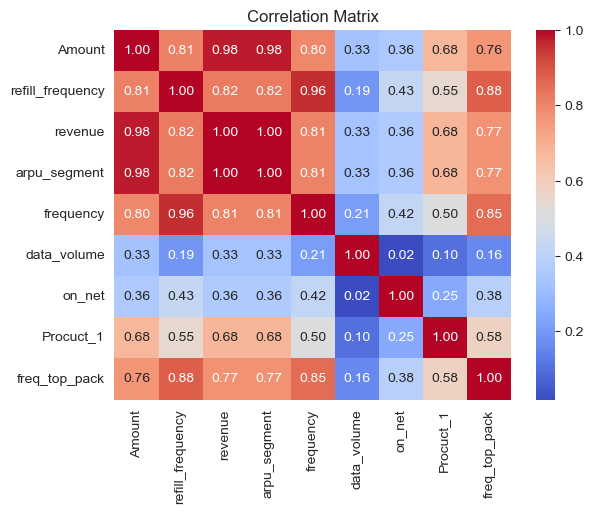

In [307]:
correlation_matrix2 = result_df.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

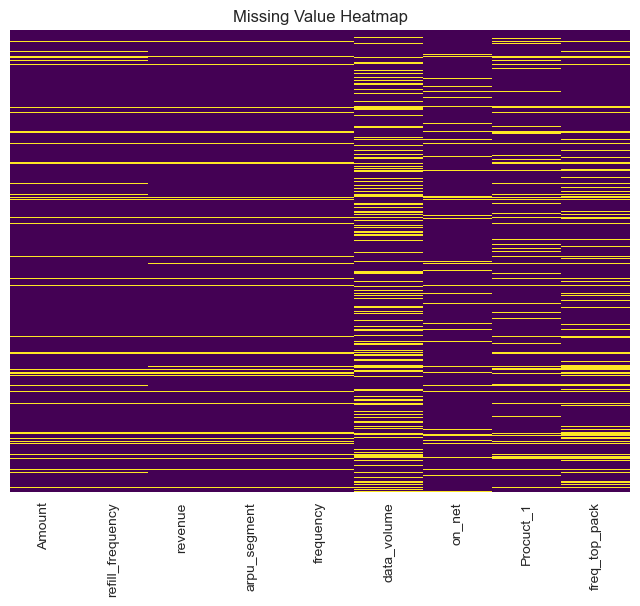

In [308]:
plt.figure(figsize=(8, 6))
sns.heatmap(result_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [312]:
df['Target'].value_counts()

0    1056551
1     282515
Name: Target, dtype: int64

In [311]:
df = df[~df.index.isin(filtered_indices)]
df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
1,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,62,31.0,0
2,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,61,NaN,0
4,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,62,31.0,0
5,24.0,42.74,1.0,42.74,14.10,2.0,4.0,3.0,NaN,44,NaN,0
7,24.0,2564.10,12.0,2777.78,926.07,13.0,NaN,96.0,96.0,59,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,41,4.0,0
1507830,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,NaN,36,2.0,0
1507831,24.0,1923.08,9.0,2136.75,712.39,10.0,NaN,34.0,74.0,40,10.0,0
1507832,24.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,39,NaN,0


In [314]:
fill_median0 = df[df['Target'] == 0].groupby('tenure')
df[df['Target'] == 0] = df[df['Target'] == 0].fillna(fill_median0.transform('median'))
df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
1,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,62,31.0,0
2,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,61,5.0,0
4,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,62,31.0,0
5,24.0,42.74,1.0,42.74,14.10,2.0,4.0,3.0,31.0,44,5.0,0
7,24.0,2564.10,12.0,2777.78,926.07,13.0,277.0,96.0,96.0,59,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,41,4.0,0
1507830,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,36,2.0,0
1507831,24.0,1923.08,9.0,2136.75,712.39,10.0,277.0,34.0,74.0,40,10.0,0
1507832,24.0,1388.89,7.0,1367.95,455.98,9.0,0.0,30.0,31.0,39,5.0,0


In [315]:
raw_data

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
0,ID_YEB05X4KUGPQ,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
1,ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,NaN,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,31.0,0
2,ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,1.0,NaN,NaN,NO,61,NaN,NaN,0
3,ID_QS4F5LEX29KM,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
4,ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,NaN,NaN,NO,62,Mixt 250F=Unlimited_call24H,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,ID_D1MA2025F1U6,NaN,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,NO,41,"Data:490F=1GB,7d",4.0,0
1507830,ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,NaN,NaN,NaN,NaN,NO,36,"Data:1000F=2GB,30d",2.0,0
1507831,ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,NaN,34.0,74.0,48.0,NaN,NaN,NO,40,All-net 500F=2000F;5d,10.0,0
1507832,ID_B0S6HQUEDWJ7,Astral,24.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,39,NaN,NaN,0


In [316]:
df.isnull().sum()

tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
regularity          0
freq_top_pack       0
Target              0
dtype: int64

In [317]:
df.to_csv('cleaned_data.csv',index=False)

In [319]:
raw_data['top_pack'].unique()

array([nan, 'On net 200F=Unlimited _call24H',
       'Mixt 250F=Unlimited_call24H',
       'All-net 500F =2000F_AllNet_Unlimited', 'All-net 500F=2000F;5d',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'On-net 1000F=10MilF;10d', 'Data:50F=30MB_24H',
       'Data: 100 F=40MB,24H', 'Jokko_Daily', 'Data:200F=Unlimited,24H',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'VAS(IVR_Radio_Daily)',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'Data:DailyCycle_Pilot_1.5GB',
       'Data:490F=1GB,7d', 'On-net 500F_FNF;3d', 'Twter_U2opia_Monthly',
       'On-net 200F=60mn;1d', 'On-net 500=4000,10d', 'Data:1000F=5GB,7d',
       'Data:500F=2GB,24H', 'Twter_U2opia_Daily', 'Data:300F=100MB,2d',
       'Data:1500F=3GB,30D', 'All-net 600F= 3000F ;5d', 'Jokko_Monthly',
       'Data: 490F=Night,00H-08H', 'Staff_CPE_Rent',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t', '200=Unlimited1Day',
       'Data:3000F=10GB,30d', 'Twter_U2opia_Weekly',
  

In [320]:
df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,regularity,freq_top_pack,Target
1,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,62,31.0,0
2,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,61,5.0,0
4,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,62,31.0,0
5,24.0,42.74,1.0,42.74,14.10,2.0,4.0,3.0,31.0,44,5.0,0
7,24.0,2564.10,12.0,2777.78,926.07,13.0,277.0,96.0,96.0,59,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1507829,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,41,4.0,0
1507830,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,36,2.0,0
1507831,24.0,1923.08,9.0,2136.75,712.39,10.0,277.0,34.0,74.0,40,10.0,0
1507832,24.0,1388.89,7.0,1367.95,455.98,9.0,0.0,30.0,31.0,39,5.0,0


In [323]:
df[df['Target'] == 1].groupby('regularity').median()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,freq_top_pack,Target
regularity,,,,,,,,,,,
1,24.0,427.35,2.0,361.540,120.510,2.0,80.0,5.0,9.0,2.0,1.0
2,24.0,427.35,2.0,361.540,120.510,2.0,80.0,5.0,9.0,2.0,1.0
3,24.0,427.35,2.0,361.540,120.510,2.0,80.0,5.0,9.0,2.0,1.0
4,24.0,427.35,2.0,361.540,120.510,2.0,80.0,5.0,9.0,2.0,1.0
5,24.0,427.35,2.0,361.540,120.510,2.0,80.0,5.0,9.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
58,24.0,2692.31,12.0,2861.970,953.850,16.0,806.0,12.0,16.0,8.0,1.0
59,24.0,3076.92,14.0,3194.440,1064.960,17.0,3056.0,17.0,21.0,9.0,1.0
60,24.0,2991.45,13.0,3187.605,1062.395,17.0,3739.5,15.0,22.5,7.0,1.0
